In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [6]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [7]:
df.shape

(158, 12)

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
df.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
country_encoding = le.fit_transform(df['Country'])

country_encoding

array([135,  58,  37, 105,  24,  45,  99, 134, 100,   6,  64,  33,   7,
        91, 150,  18,  82,  63,  12, 148, 149, 106, 153, 123, 109,  49,
        27, 115,  46,   4,  36, 151,  29, 140, 119, 129,  88, 137,  73,
       132, 142,  42,  52, 152, 124,  68, 128,  40,   9,  65,  15,  92,
       110,  70, 125,  81, 101, 111,  11, 113,  86,  34,  80, 117,  67,
       104,  35,   2,  72, 145,  90,  56,  43,  60, 154, 144,  74, 103,
        14,   8, 107,  69,  94,  28, 156, 116, 121, 114,  76, 112, 126,
        95,  83,  96,   1,  16,  78,  39,  75,  93, 133,  51,  77,  57,
        55, 138, 143, 108,  10,  61, 147,  62, 127,  50, 157,  79,  59,
       131,  54,  32,  98,  44, 122,  89,  71,  38,   5,  17,  97,  48,
        85, 130,  23,  19,  41, 155,   3,  87,  31,  30, 146, 120,  47,
       102,  22, 139,  84,  25,  26,  53,  66,  20,   0, 118,  13, 136,
        21, 141])

In [14]:
df['Country'] =country_encoding

In [15]:
region_encoding = le.fit_transform(df['Region'])

region_encoding 

array([9, 9, 9, 9, 5, 9, 9, 9, 0, 0, 4, 3, 9, 3, 5, 3, 9, 9, 9, 4, 9, 4,
       3, 6, 3, 9, 3, 4, 9, 3, 1, 3, 3, 6, 4, 9, 9, 2, 4, 3, 3, 3, 3, 1,
       1, 2, 2, 3, 4, 9, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 6, 1, 4, 1, 3, 9,
       9, 4, 1, 1, 8, 2, 1, 6, 6, 4, 1, 8, 7, 1, 7, 4, 1, 2, 8, 1, 1, 9,
       1, 6, 8, 4, 1, 8, 1, 1, 8, 3, 6, 2, 8, 9, 4, 1, 3, 1, 4, 4, 7, 4,
       1, 4, 8, 8, 8, 8, 7, 8, 3, 8, 7, 8, 8, 8, 8, 8, 1, 8, 6, 1, 8, 7,
       8, 1, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 7, 8,
       8, 4, 8, 8])

In [16]:
df['Region'] =region_encoding

In [17]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

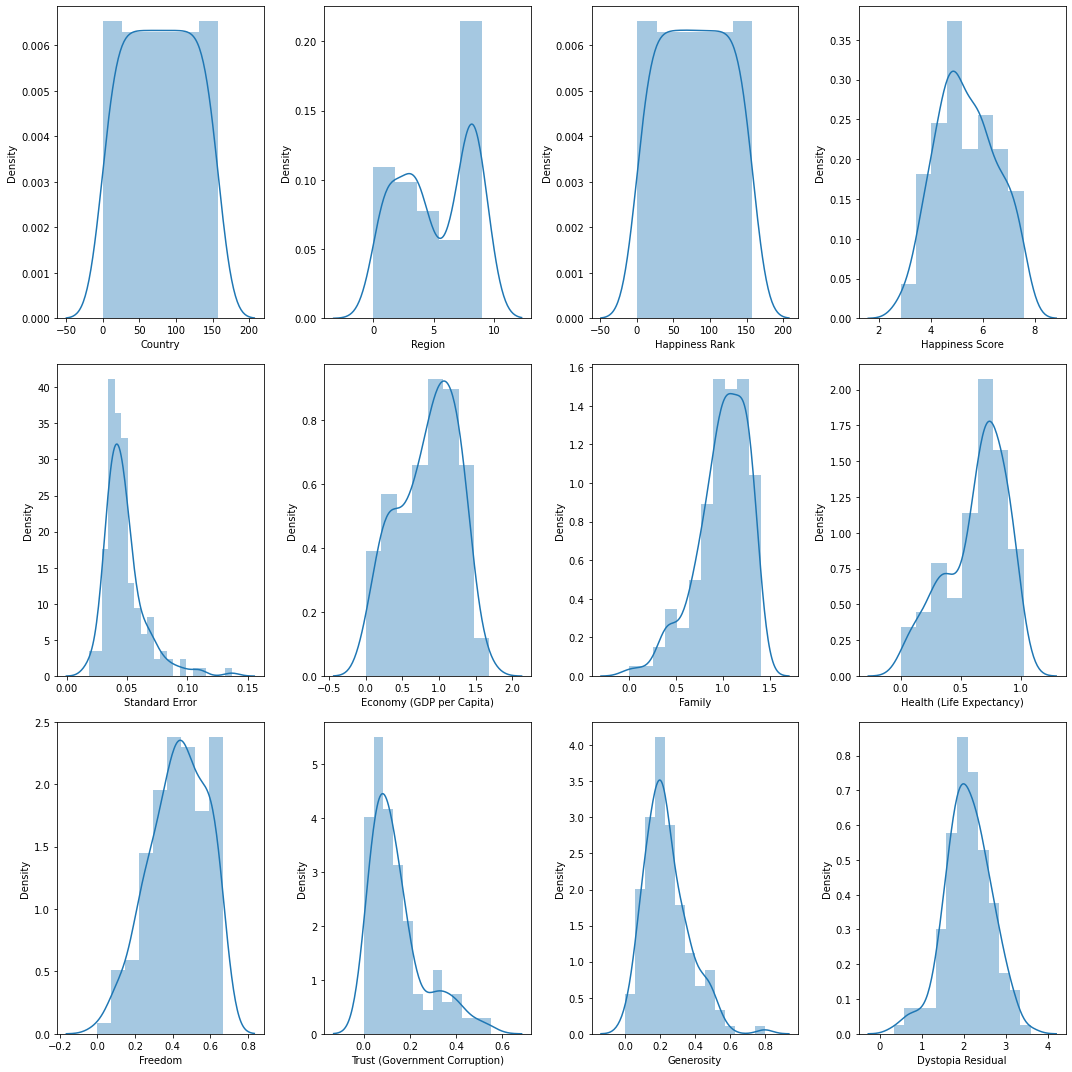

In [18]:
plt.figure(figsize=(15,15))
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(3,4, plotnumber)
        sns.distplot(df[column])
        plotnumber += 1
        
plt.tight_layout()

In [19]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [20]:
x = df.drop(columns=['Happiness Score'])
y = df['Happiness Score']

In [21]:
x


,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [22]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

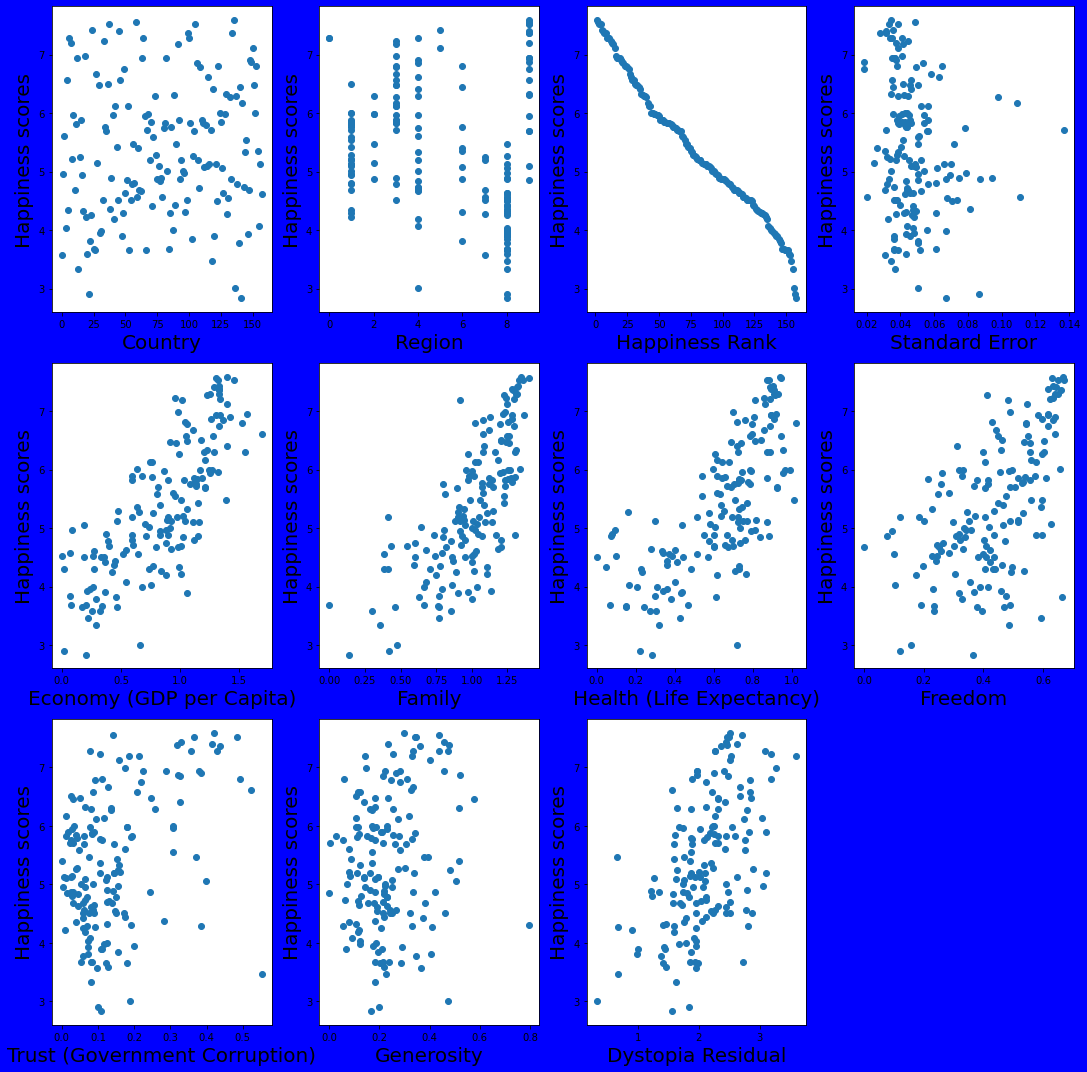

In [23]:
plt.figure(figsize=(15,15), facecolor='blue')
plotnumber = 1

for column in x:
    if plotnumber <= 11:
        plt.subplot(3,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Happiness scores', fontsize=20)
        plotnumber += 1
        
plt.tight_layout()

In [24]:
scaler = StandardScaler()
Xscaled = scaler.fit_transform(x)
Xscaled

array([[ 1.23877001,  1.30025593, -1.72099989, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-0.44946522,  1.30025593, -1.69907456, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.90989302,  1.30025593, -1.67714922, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.26069514, -0.37544095,  1.67742676, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-1.26069514,  0.96511655,  1.69935209, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.37032081,  0.96511655,  1.72127743, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [25]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


<AxesSubplot:>

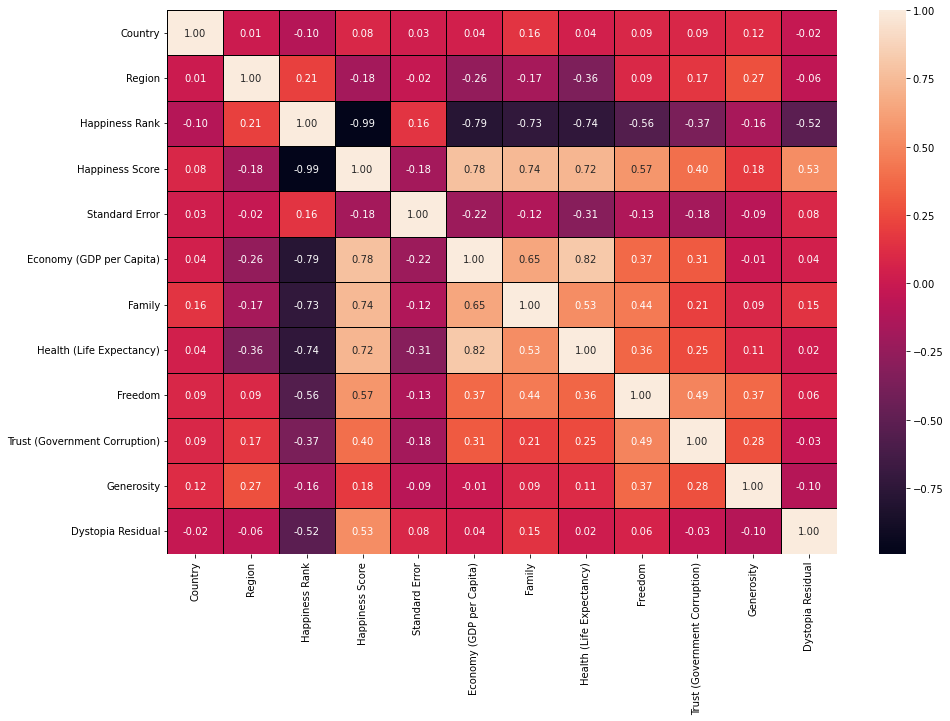

In [26]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='0.2f')

In [27]:
x_train, x_test, y_train, y_test = train_test_split(Xscaled,y,test_size=0.25, random_state=696969)

In [28]:
re = LinearRegression()

re.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = re.predict(x_test)

In [30]:
y_pred

array([4.36907317, 6.13023794, 5.95973486, 6.4547479 , 4.88452593,
       5.47706358, 7.19981568, 5.7704547 , 4.68565207, 3.58688193,
       4.78796072, 7.11947702, 4.51708251, 5.7906307 , 3.46474141,
       3.65593683, 4.85753702, 5.87839045, 3.00643908, 5.1924147 ,
       6.75011325, 5.12882864, 3.81924066, 5.19232275, 6.47685348,
       6.30246993, 5.99519272, 5.00710205, 3.9556211 , 6.78623734,
       4.51434272, 7.36349002, 5.75440849, 5.47383912, 5.07325136,
       4.51790397, 4.41927508, 5.82414304, 3.90368344, 4.94887057])

In [31]:
re.score(x_train, y_train)

0.9999999489168732

In [32]:
re.score(x_test, y_test)

0.9999999235576326

In [33]:
re.score(x_test, y_pred)

1.0

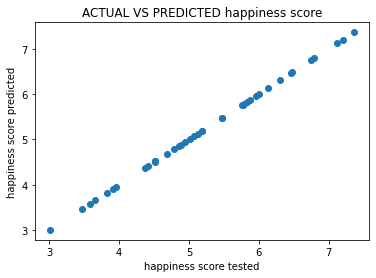

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('happiness score tested')
plt.ylabel('happiness score predicted')
plt.title("ACTUAL VS PREDICTED happiness score")
plt.show()

In [35]:
#model Evaluation

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [37]:
mean_absolute_error(y_test, y_pred)

0.0002637795910050311

In [38]:
mean_squared_error(y_test, y_pred)

8.997184295009106e-08

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0002999530679124504

In [41]:
#Regularization

In [42]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [43]:
lasso = LassoCV(alphas=None, max_iter=100, normalize=True)
lasso.fit(x_train, y_train)

C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013036123463393334, tolerance: 0.012713296545744683
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018603631928072684, tolerance: 0.012713296545744683
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\NAYAN PRADEEP DALVI\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017444667051761398, tolerance: 0.012713296545744683
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\NAYAN PRADEEP DALVI\anaco

LassoCV(max_iter=100, normalize=True)

In [44]:
alpha = lasso.alpha_
alpha

0.00010563997304834841

In [45]:
lassoreg = Lasso(alpha)

lassoreg.fit(x_train, y_train)

Lasso(alpha=0.00010563997304834841)

In [46]:
lassoreg.score(x_train, y_train)

0.9999993821418202

In [47]:
ypred = lassoreg.predict(x_test)

In [48]:
lassoreg.score(x_test, ypred)

1.0